# <center><font style="color:rgb(100,109,254)"> LookUpTables & Gamma Correction</font><center>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## <font style="color:rgb(134,19,348)">  Gamma correction  </font> 

Gamma correction can be used to correct the brightness of an image by using a non linear transformation between the input values and the mapped output values, now this is different from previous brightness enhancement which is a linear operation and  every pixel intensity is enhanced equally.

As this relation is non linear, the effect will not be the same for all the pixels and will depend to their original value.

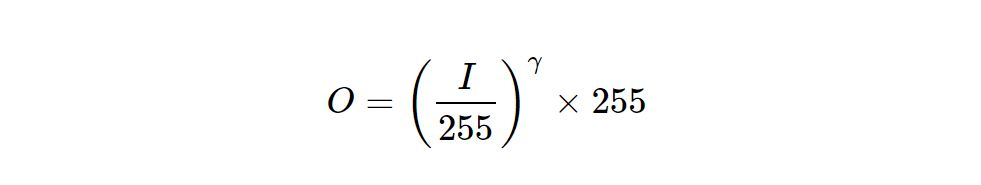

Where $I$ is the input image and $y$ is the gamma value 

So from above you can see that Gamma values less then `1` will shift the image pixels towards the darker end whereas gamma values greater than `1` will make the image appear brighter. A gamma value of 1 will have no affect on the image.

We will correct the below underexposed image with gamma correction 

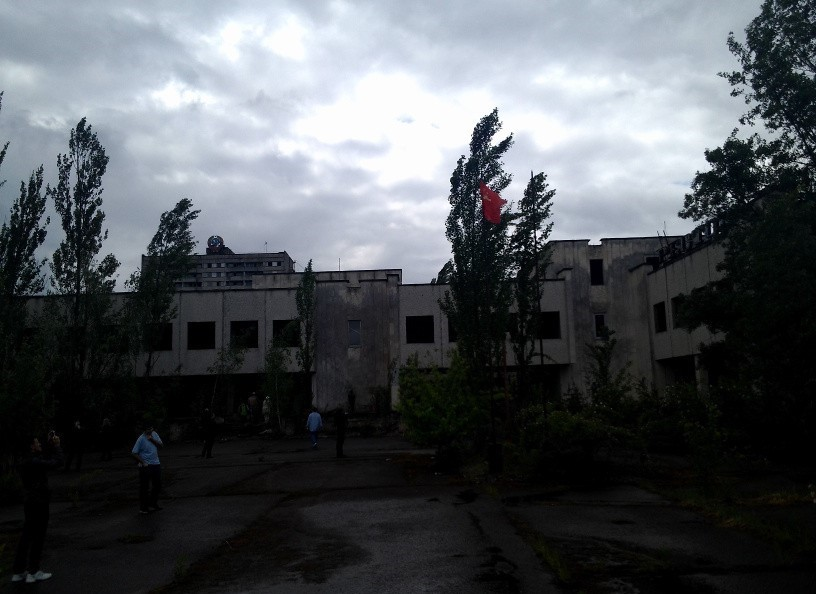

<center><small>Visem [CC BY-SA 3.0]</small></center>
    
<br>

**But first lets try to enhance this image with brightness enhancement technique we learned earlier**

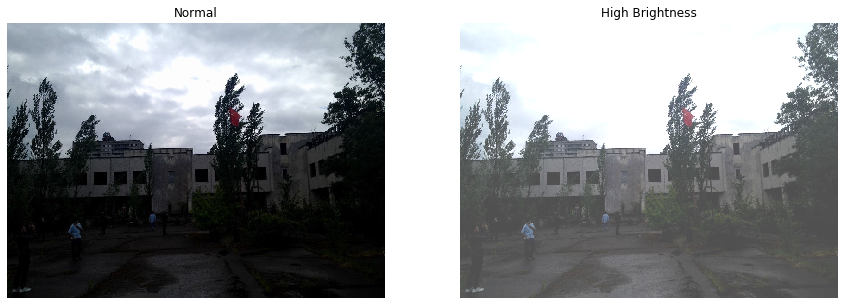

In [48]:
image = cv2.imread('media/M4/gammacorrection.jpg')

# Set some brightness constant value
constant = 80

# Add constant for increasing brightness, we convert to uint32 to prevent numpy rounding
bright_image = np.int32(image) + constant

# Remember that numpy rounds of, so we need to clip values above 255 and below 0 and then convert it to uint8
bright_image = np.clip(bright_image, 0, 255)
bright_image = np.uint8(bright_image)

plt.figure(figsize=[23,23])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Normal");plt.axis('off');
plt.subplot(132);plt.imshow(bright_image[...,::-1]);plt.title("High Brightness");plt.axis('off');

This is not too bad, we can even improve the contrast, but because of linear enhancement, see the clouds have also become saturated, with Gamma correction, we won't have this problem. 

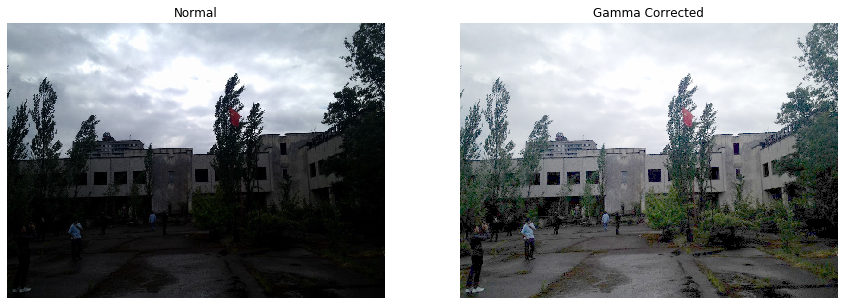

In [49]:
image = cv2.imread('media/M4/gammacorrection.jpg')

# set the gamma value
gamma = 0.4

# this is the formula above for gamma correction
bright_image =  pow(np.int32(image) / 255.0, gamma) * 255.0

# clip the image to be in range 0,255
bright_image = np.clip(bright_image , 0 , 255)

# convert back to uint8
bright_image = np.uint8(bright_image)


plt.figure(figsize=[23,23])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Normal");plt.axis('off');
plt.subplot(132);plt.imshow(bright_image[...,::-1]);plt.title("Gamma Corrected");plt.axis('off');

See how the results are much better with gamma correction

## <font style="color:rgb(134,19,348)"> LookUp Tables   </font> 
We can improve the computational performance of the this gamma correction, this wont effect the results but computationally this be really fast, so right now what is happening is that you are taking the power of each pixel in image, now the bigger the image the more compute required, and if you have a whole folder of images then you need to you will be performing this power operation on each pixel of every image. Now this not required because you're doing a very simple image , you're just transforming some fix numbers (256 numbers to be exact, pixel intensity from 0-255) to some fix other numbers (fix power of these numbers). So you're just doing a simple mapping of 256 numbers.

Why not you do the mapping first and save the transformed 256 numbers and then just replace the those values which real pixel values of any image. For example suppose a gamma value of 0.4 transforms an intensity value of `34` to lets say `59`. So we can just save this mapping now whenever an image has pixel with intensity value `34` we will replace it with `59`. Similarly we can save 256 such maps. And no more computation is required.

## <font style="color:rgb(134,19,348)"> Gamma Correction with LookUp Tables </font> 
Now lets do the gamma correction with lookUp tables, First we have to create the lookUp table

In [50]:
# creating an array of zeros of required shape to store the maps
lookUpTable = np.zeros((1,256), np.uint8)

# setting the mapping value of gamma
gamma = 0.4

# mapping each value from 0 to 255 to its required power and then clipping it
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    
# you can see the lookUpTable, look how 1 has been mapped to 27, 2 to 36 and so on.
print(lookUpTable)

[[  0  27  36  43  48  52  56  60  63  66  69  72  75  77  79  82  84  86
   88  90  92  93  95  97  99 100 102 103 105 106 108 109 111 112 113 115
  116 117 119 120 121 122 123 125 126 127 128 129 130 131 132 133 134 136
  137 138 139 140 141 141 142 143 144 145 146 147 148 149 150 151 152 152
  153 154 155 156 157 157 158 159 160 161 161 162 163 164 165 165 166 167
  168 168 169 170 171 171 172 173 173 174 175 176 176 177 178 178 179 180
  180 181 182 182 183 184 184 185 186 186 187 187 188 189 189 190 191 191
  192 192 193 194 194 195 195 196 197 197 198 198 199 200 200 201 201 202
  202 203 204 204 205 205 206 206 207 207 208 208 209 210 210 211 211 212
  212 213 213 214 214 215 215 216 216 217 217 218 218 219 219 220 220 221
  221 222 222 223 223 224 224 225 225 226 226 227 227 228 228 229 229 229
  230 230 231 231 232 232 233 233 234 234 235 235 235 236 236 237 237 238
  238 239 239 239 240 240 241 241 242 242 242 243 243 244 244 245 245 245
  246 246 247 247 248 248 248 249 249 

**Now that we have created our LookUpTable, we will use it by `cv2.LUT()` , which will do the actual mapping using the lookUpTable**

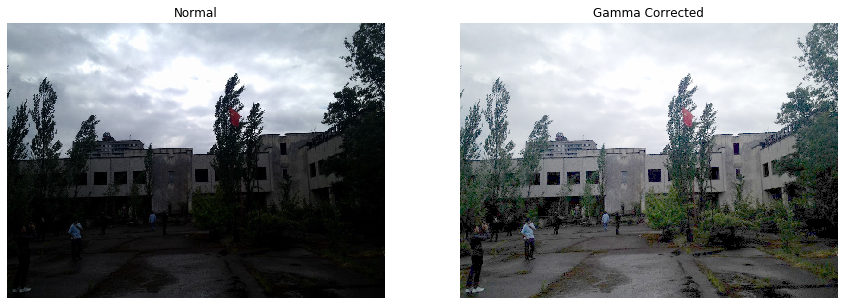

In [51]:
final = cv2.LUT(image, lookUpTable)
    
plt.figure(figsize=[23,23])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Normal");plt.axis('off');
plt.subplot(132);plt.imshow(bright_image[...,::-1]);plt.title("Gamma Corrected");plt.axis('off');